In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline
sns.set_context(rc={'figure.figsize': (16,12)})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# Import dataset
df = pd.read_csv('df1.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,index_orig,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,latitude,longitude,...,county,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,area_living
0,4176,12658092,0.0507,2016-01-21,2016,1,2.0,2,33339295.0,-118331034.0,...,3101.0,96207,0.0,1978,165947.0,327635.0,2015,161688.0,5433.63,1703
1,11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2,33340045.0,-118325943.0,...,3101.0,96207,0.0,1920,300894.0,545689.0,2015,244795.0,7949.83,865
2,60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3,33340134.0,-118325615.0,...,3101.0,96207,0.0,1996,265712.0,398565.0,2015,132853.0,6174.19,1500
3,38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2,33340239.0,-118324732.0,...,3101.0,96207,0.0,1964,89781.0,139956.0,2015,50175.0,3036.02,1422
4,72995,12659124,0.0421,2016-09-02,2016,9,2.0,2,33340508.0,-118324950.0,...,3101.0,96207,0.0,1965,103700.0,271000.0,2015,167300.0,5934.02,902


[]

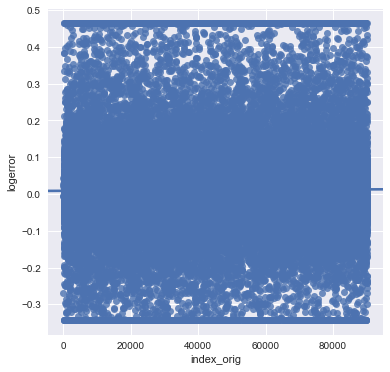

[]

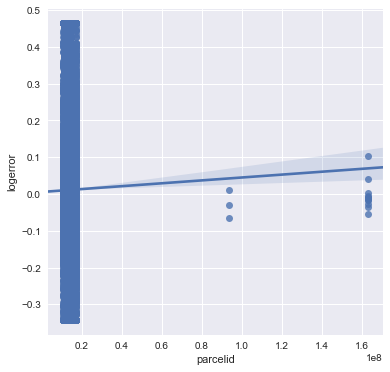

[]

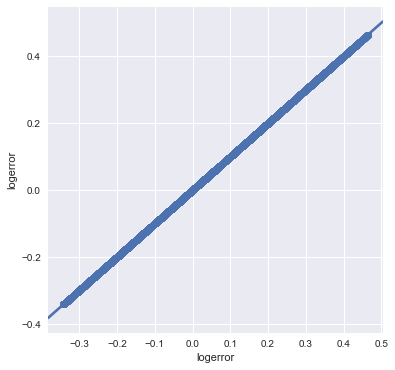

[]

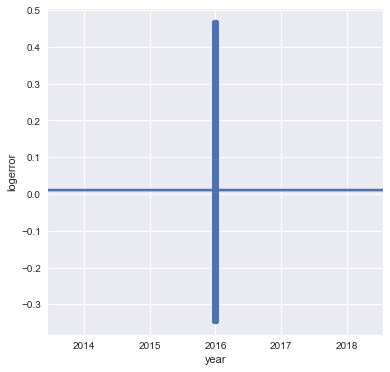

[]

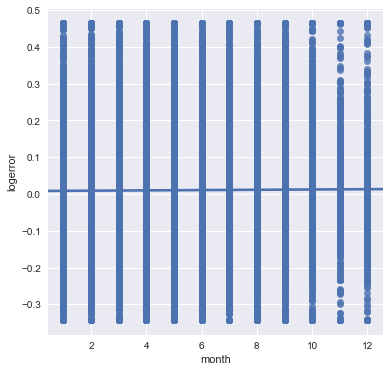

[]

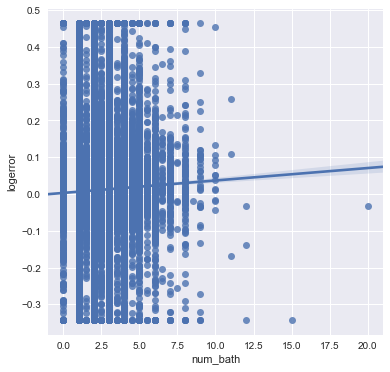

[]

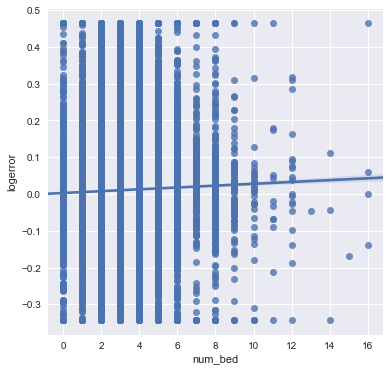

[]

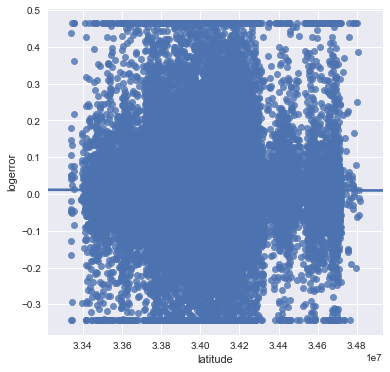

[]

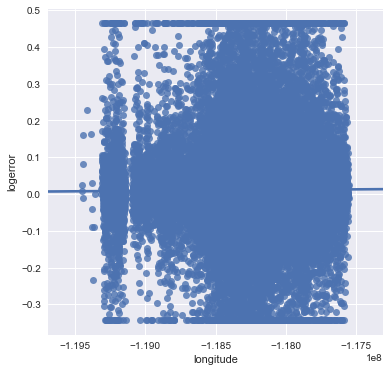

[]

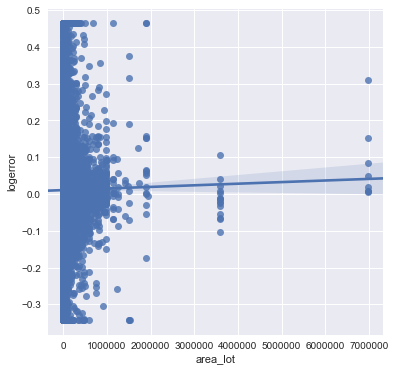

[]

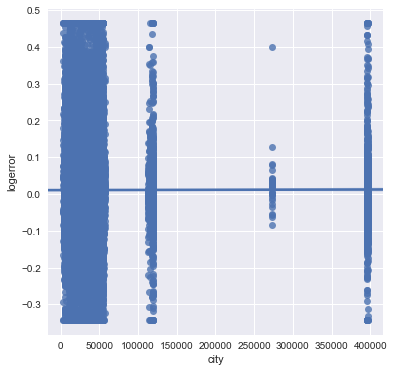

[]

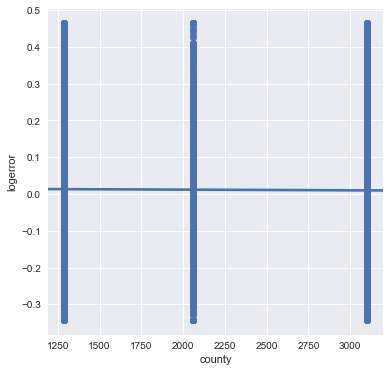

[]

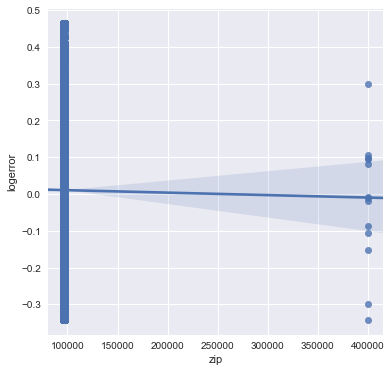

[]

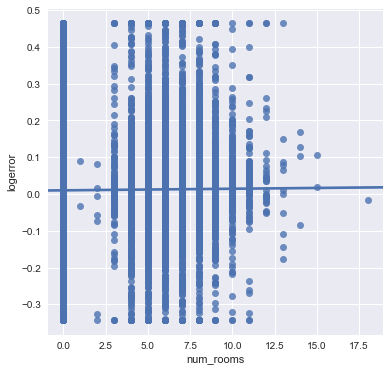

[]

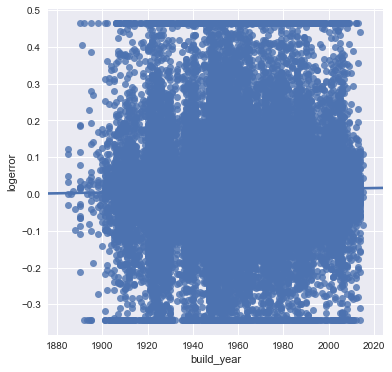

[]

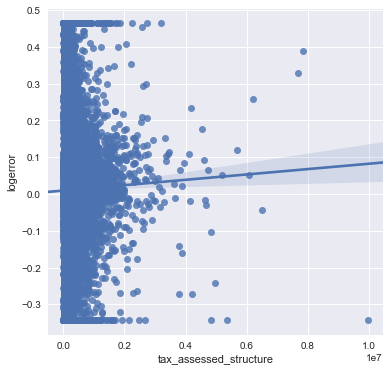

[]

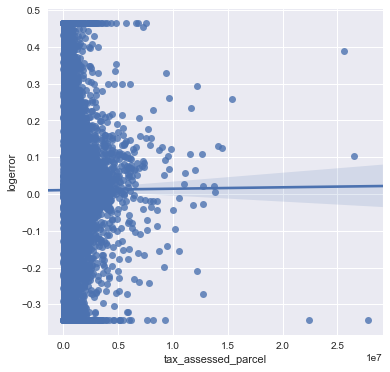

[]

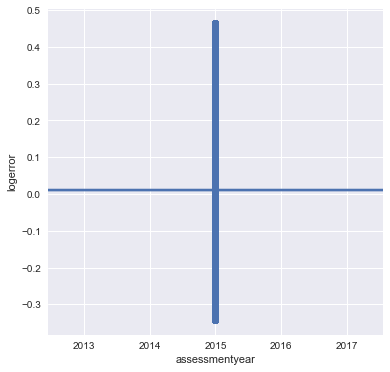

[]

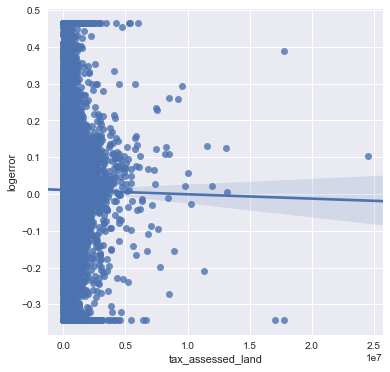

[]

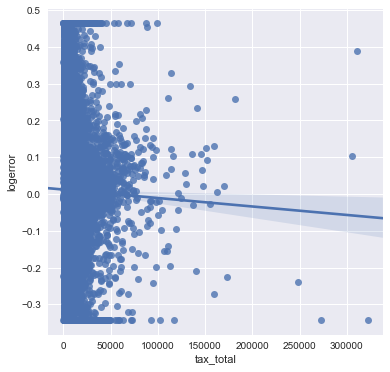

[]

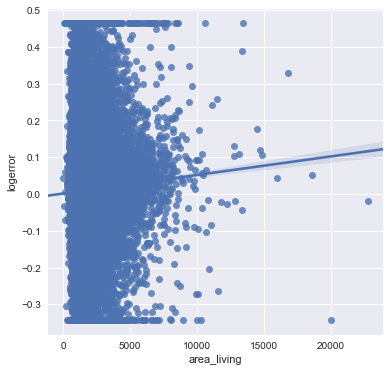

In [26]:
cols = list(df.select_dtypes(include=[np.number]).columns.values)

for i in cols:
    plt.figure(figsize=(6,6))
    sns.regplot(df[i], df.logerror)
    plt.plot()
    plt.show()

In [27]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('logerror ~ area_living',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 15 Sep 2017   Prob (F-statistic):           4.13e-40
Time:                        16:39:43   Log-Likelihood:                 68694.
No. Observations:               79620   AIC:                        -1.374e+05
Df Residuals:                   79618   BIC:                        -1.374e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept       0.0015      0.001      1.958      0.050     -1.21e-06     0.003
area_living   5.04e-06    3.8e-07     13.264      0.000       4.3e-06  5.78e-06
==============================================================================
Omnibus:                    17723.913   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139455.845
Skew:                           0.859   Prob(JB):                         0.00
Kurtosis:                       9.252   Cond. No.                     4.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('logerror ~ area_lot',df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.098
Date:                Fri, 15 Sep 2017   Prob (F-statistic):              0.147
Time:                        16:41:03   Log-Likelihood:                 68607.
No. Observations:               79620   AIC:                        -1.372e+05
Df Residuals:                   79618   BIC:                        -1.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0106      0.000     28.421      0.000         0.010     0.011
area_lot    4.352e-09      3e-09      1.448      0.147     -1.54e-09  1.02e-08
==============================================================================
Omnibus:                    17780.095   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137444.767
Skew:                           0.867   Prob(JB):                         0.00
Kurtosis:                       9.199   Cond. No.                     1.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from sklearn.linear_model import LinearRegression
X = df.drop('logerror', axis = 1)
X = X.select_dtypes(include=[np.number])

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lm.fit(X, df.logerror)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,index_orig,-1.500788e-08
1,parcelid,1.391334e-10
2,year,-8.814468e-14
3,month,4.802295e-04
4,num_bath,-5.803491e-04
5,num_bed,-9.351994e-04
6,latitude,-1.027135e-11
7,longitude,2.770048e-09
8,area_lot,5.212447e-09
9,city,5.844466e-09


In [37]:
pred1 = lm.predict(X)
pred1

array([ 0.0077444 , -0.00509181,  0.00595709, ...,  0.01771641,
        0.02438777,  0.02080945])

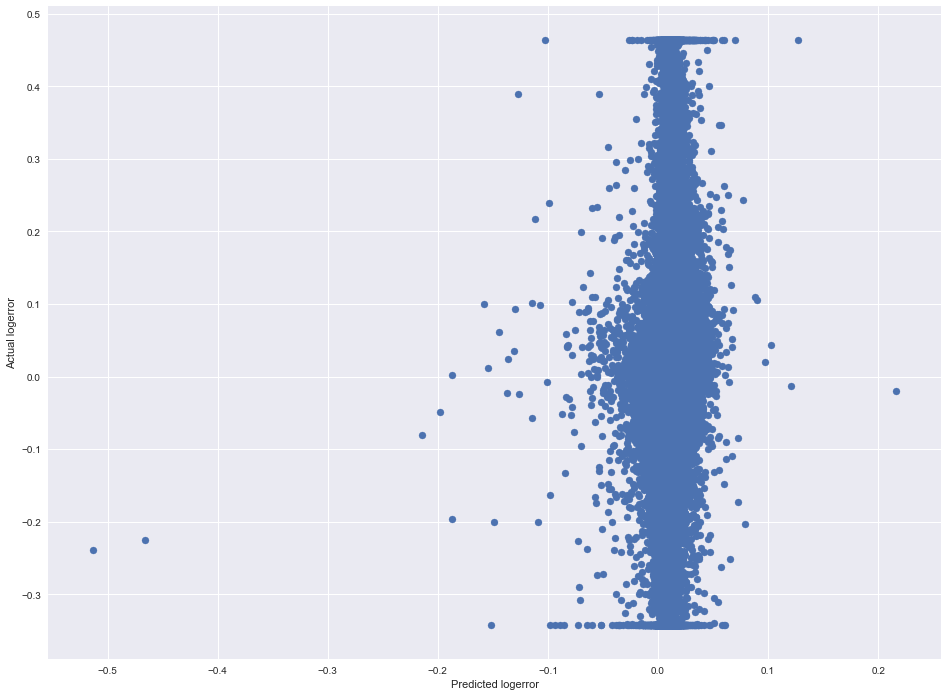

In [38]:
plt.scatter(pred1, df.logerror)
plt.xlabel('Predicted logerror')
plt.ylabel('Actual logerror')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error as mse

print('The MSE of the prediction is:', mse(df.logerror, pred1))

The MSE of the prediction is: 0.0103699747326


In [51]:
lm = LinearRegression()
lm.fit(X[['area_living']], df.logerror)
mse_area_living = np.mean((df.logerror - lm.predict(X[['area_living']])) ** 2)
print('The MSE of the prediction is:', mse_area_living)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010426243204322175


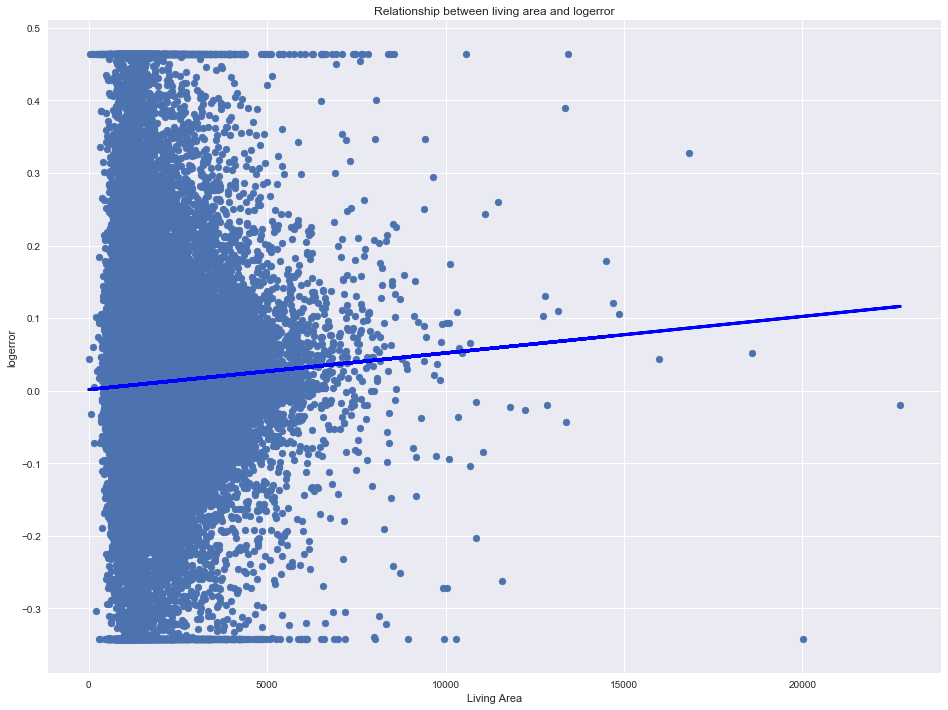

In [44]:
plt.scatter(df.area_living, df.logerror)
plt.xlabel("Living Area")
plt.ylabel("logerror")
plt.title("Relationship between living area and logerror")

plt.plot(df.area_living, lm.predict(X[['area_living']]), color='blue', linewidth=3)
plt.show()

In [52]:
lm = LinearRegression()
lm.fit(X[['area_lot']], df.logerror)
mse_area_lot = np.mean((df.logerror - lm.predict(X[['area_lot']])) ** 2)
print('The MSE of the prediction is:', mse_area_lot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010449007048689158


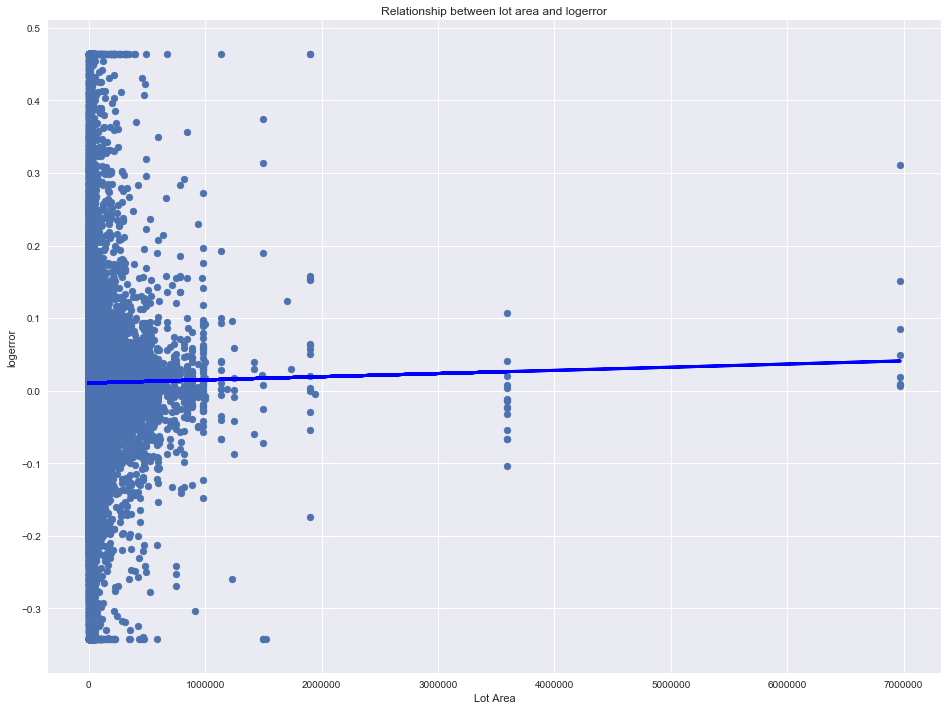

In [47]:
plt.scatter(df.area_lot, df.logerror)
plt.xlabel("Lot Area")
plt.ylabel("logerror")
plt.title("Relationship between lot area and logerror")

plt.plot(df.area_lot, lm.predict(X[['area_lot']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010441322861353767


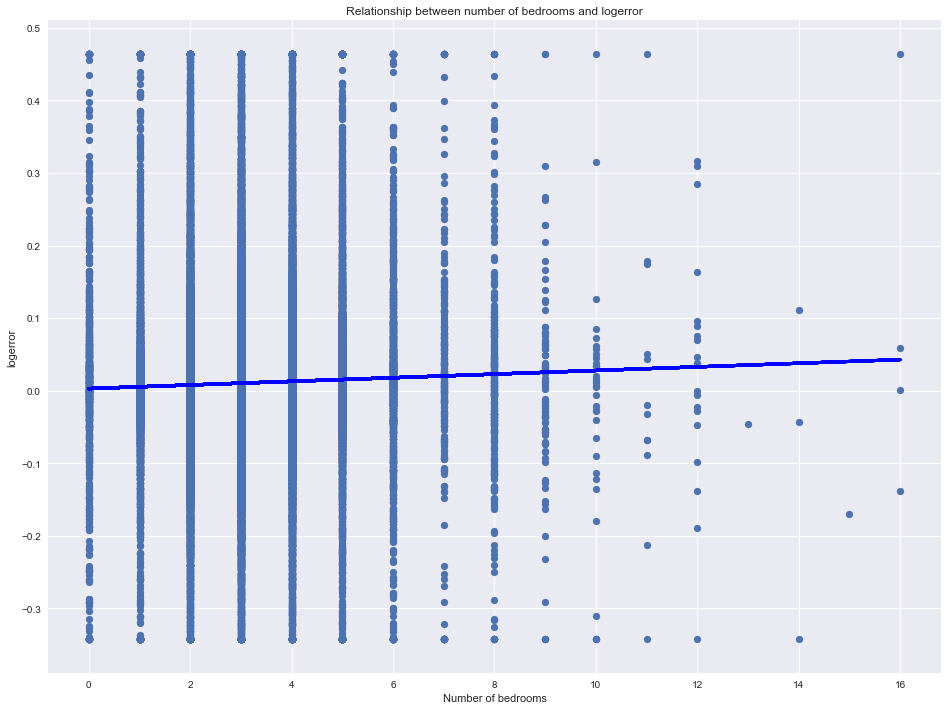

In [53]:
lm = LinearRegression()
lm.fit(X[['num_bed']], df.logerror)
mse_num_bed = np.mean((df.logerror - lm.predict(X[['num_bed']])) ** 2)
print('The MSE of the prediction is:', mse_num_bed)

plt.scatter(df.num_bed, df.logerror)
plt.xlabel("Number of bedrooms")
plt.ylabel("logerror")
plt.title("Relationship between number of bedrooms and logerror")

plt.plot(df.num_bed, lm.predict(X[['num_bed']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.01044362412196041


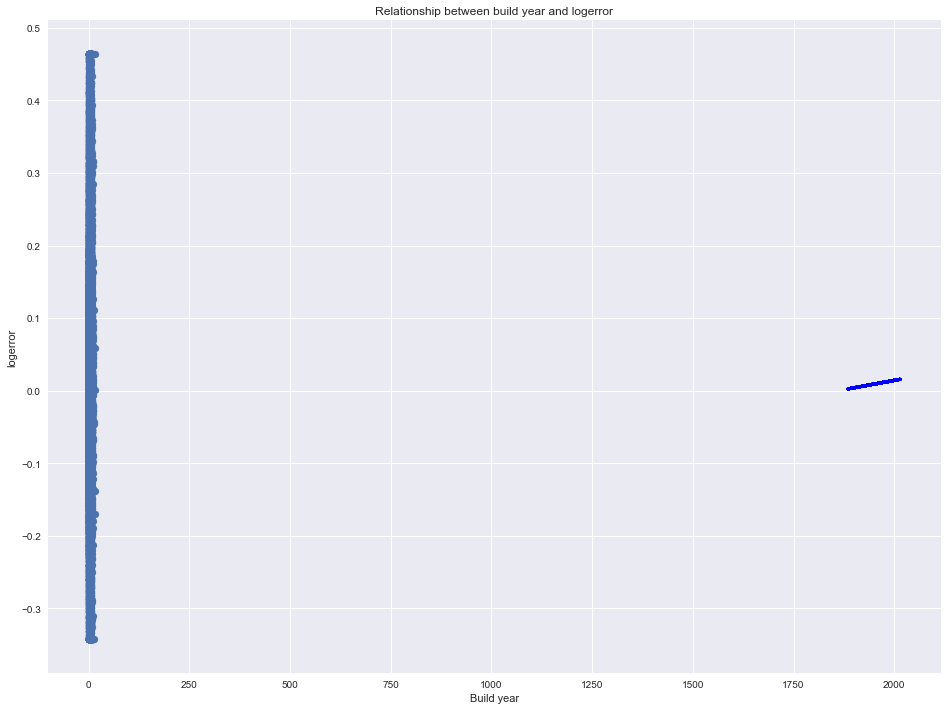

In [54]:
lm = LinearRegression()
lm.fit(X[['build_year']], df.logerror)
mse_area_lot = np.mean((df.logerror - lm.predict(X[['build_year']])) ** 2)
print('The MSE of the prediction is:', mse_area_lot)

plt.scatter(df.num_bed, df.logerror)
plt.xlabel("Build year")
plt.ylabel("logerror")
plt.title("Relationship between build year and logerror")

plt.plot(df.build_year, lm.predict(X[['build_year']]), color='blue', linewidth=3)
plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The MSE of the prediction is: 0.010447727118424593


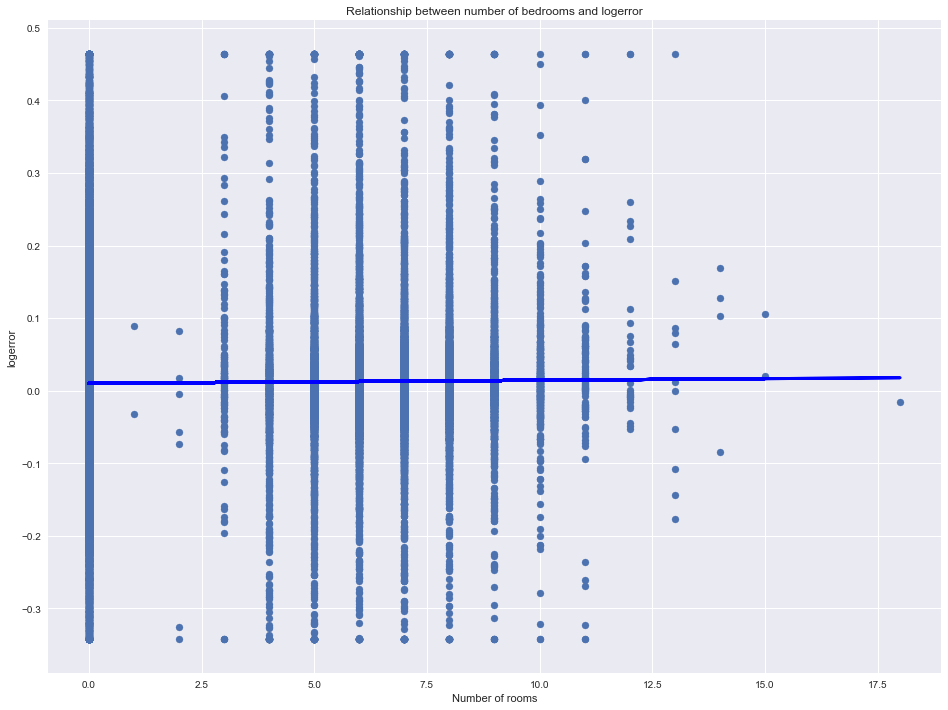

In [55]:
lm = LinearRegression()
lm.fit(X[['num_rooms']], df.logerror)
mse_num_rooms = np.mean((df.logerror - lm.predict(X[['num_rooms']])) ** 2)
print('The MSE of the prediction is:', mse_num_rooms)

plt.scatter(df.num_rooms, df.logerror)
plt.xlabel("Number of rooms")
plt.ylabel("logerror")
plt.title("Relationship between number of bedrooms and logerror")

plt.plot(df.num_rooms, lm.predict(X[['num_rooms']]), color='blue', linewidth=3)
plt.show()

In [45]:
lm.fit(X[['area_living','area_lot','num_bed','num_bath','build_year','month','num_rooms']],df.logerror)
pred2 = lm.predict(X[['area_living','area_lot','num_bed','num_bath','build_year','month','num_rooms']])
print('The mean squared error for these variables is:', mse(df.logerror, pred2))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The mean squared error for these variables is: 0.0104220641981
